## Analyzing the Stroop Effect

(1) What is the independent variable? What is the dependent variable?

Dependent variable is what is being studied and measured, while independent variable is a variable that stands alone and isn't changed by the other variables you are trying to measure. Dependent variable is a result of the changes to the independent variable(s). 

In this case, the independent variable is the condition of Stroop task: Congruent vs. Incongruent, and the dependent variable is the time for participants to name the colors of ink. The value of dependent variable (in seconds) is stored in the dataset below.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis: $$H_0: \mu_{c} - \mu_{i} = 0$$


Alternative Hypothesis: $$H_1: \mu_{c} - \mu_{i} \neq 0$$


**$\mu_{c}$ and $\mu_{i}$ are the population mean values for congruent and incongruent result, respectivley.**

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')

In [3]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
# the describe function gives us all the descriptive statistics we are looking for in this dataset
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
mean_c = df['Congruent'].mean()
mean_i = df['Incongruent'].mean()

print("The mean of Congruent is %0.2f." % mean_c) 
print("The mean of Incongruent is %0.2f." % mean_i) 

The mean of Congruent is 14.05.
The mean of Incongruent is 22.02.


In [6]:
std_c = df['Congruent'].std()
std_i = df['Incongruent'].std()

print("The Standard Deviation of Congruent is %0.2f." % std_c) 
print("The Standard Deviation of Incongruent is %0.2f." % std_i) 

The Standard Deviation of Congruent is 3.56.
The Standard Deviation of Incongruent is 4.80.


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

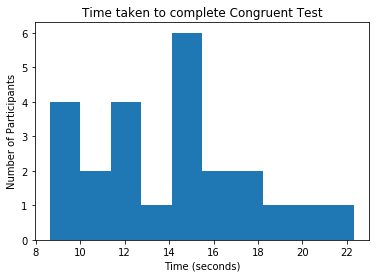

In [8]:
plt.hist(df['Congruent'])

plt.xlabel('Time (seconds)')
plt.ylabel('Number of Participants')
plt.title('Time taken to complete Congruent Test');

Note: Time taken to complete Congruent Test ranges from 8 to 22 seconds. The mode is between 14 secs and 16 secs. 

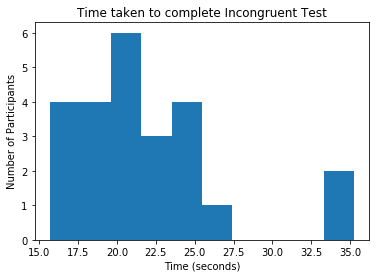

In [9]:
plt.hist(df['Incongruent'])

plt.xlabel('Time (seconds)')
plt.ylabel('Number of Participants')
plt.title('Time taken to complete Incongruent Test');

Note: Time taken to complete Incongruent Test ranges from 15 seconds to 35 seconds. However, most people fell between 15 seconds and 27 seconds.

(array([4., 4., 6., 3., 4., 1., 0., 0., 0., 2.]),
 array([15.687 , 17.6438, 19.6006, 21.5574, 23.5142, 25.471 , 27.4278,
        29.3846, 31.3414, 33.2982, 35.255 ]),
 <a list of 10 Patch objects>)

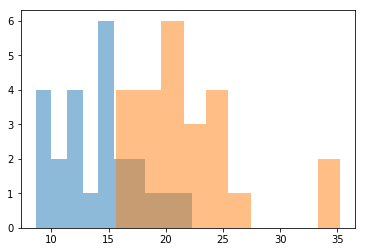

In [10]:
plt.hist(df['Congruent'], alpha=.5);
plt.hist(df['Incongruent'], alpha=.5)

Note: When we put two histograms together we can clearly see the distinct difference between two tests. Apparently, time spent less to answer the Congruent Test compared to time spent on Incongruent Test.

In [11]:
# bootstrap sampling

mean_c, mean_i, diffs = [], [], []

for _ in range(10000):
    bootsamp = df.sample(24, replace = True)
    mean_con = bootsamp['Congruent'].mean()
    mean_incon = bootsamp['Incongruent'].mean()
    # append the info 
    mean_c.append(mean_con)
    mean_i.append(mean_incon)
    diffs.append(mean_con - mean_incon) 

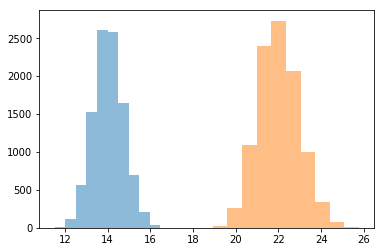

In [12]:
plt.hist(mean_c, alpha = 0.5);
plt.hist(mean_i, alpha = 0.5); # They look pretty normal to me!

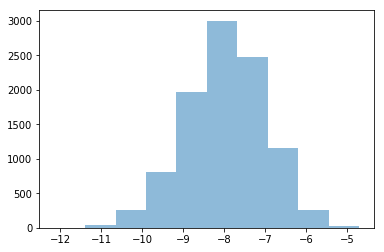

In [13]:
plt.hist(diffs, alpha = 0.5);

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? 

Since we don't have any information about the population, here I perform two tailed t-test for the given dataset. The t-test compares the mean of two test results to see if there are statistically significant differences between the means. 

- 95% confidance level
- Sample Size: n = 24
- Degree of freedom: df = n - 1 = 23

In [16]:
import math
from scipy.stats import t as pt

In [17]:
# Perform the statistical test here
t_critical = 2.0687

print("t-critical value for two tailed test at 95% confidance level is:",t_critical)

t-critical value for two tailed test at 95% confidance level is: 2.0687


In [18]:
# Build a function for t-test

def t_test(a, b, alpha, t_critical):
    mean_a = a.mean()
    mean_b = b.mean()
    
    diffs_mean = mean_a - mean_b
    diffs_results = a - b

    sample_size = len(a)
    df = sample_size - 1

    std = diffs_results.std()
    
    # Let's perform t-test!

    t_stat = diffs_mean / (std / math.sqrt(sample_size))
    p_value = pt.pdf(t_stat, df)
        
    ci_lower = diffs_mean - t_critical * (std / math.sqrt(sample_size))
    ci_upper = diffs_mean + t_critical * (std / math.sqrt(sample_size))

    print("REJECT the null hypothesis? " + str(p_value < alpha))
    print("The t statistic is : " + str(abs(t_stat)))
    print("The p value is : " + str(p_value))
                                                            
    print("The confidence interval for a t-critical value of " + str(t_critical) + " is: " \
           + "(" + str(ci_lower) + ", " + str(ci_upper) + ")")

In [19]:
# origianl sample
t_test(df['Congruent'], df['Incongruent'], 0.025, t_critical)

REJECT the null hypothesis? True
The t statistic is : 8.020706944109955
The p value is : 4.393995815913927e-08
The confidence interval for a t-critical value of 2.0687 is: (-10.019070003432619, -5.910513329900711)


In [20]:
# bootstrap sampling

mean_c = np.asarray(mean_c)
mean_i = np.asarray(mean_i)

t_test(mean_c, mean_i, 0.025, t_critical)

REJECT the null hypothesis? True
The t statistic is : 819.0341951938633
The p value is : 0.0
The confidence interval for a t-critical value of 2.0687 is: (-7.982297334005169, -7.942075874328163)


/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4683: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


Note: 

The two tailed t-test was performed with an alpha level of 0.025. As a result of the confidence level and 23 degrees of freedom, t-critcal value is 2.0687. The t-statistic is -8.02070694411 and, since p_value < alpha, we reject the null hypothesis. This means that the Congruent result and Incongruent result are not the same. The 95% confidence interval is (-10.0193, -5.9102).

These results match my expectations. My expectation derives from the data visulization above. Having performed the statistical analysis, it matches my expectation that the Incongruent task is more difficult than the Congruent task and it takes longer.